In [5]:
# Library and data
library(rms)
library(pROC)
library(rmda)
train <-read.csv("E:/Experiments/YulanPeng/Wenwen/OSDFS/ScoreTrain-2OS.csv")
test <-read.csv("E:/Experiments/YulanPeng/Wenwen/OSDFS/ScoreTest.csv")

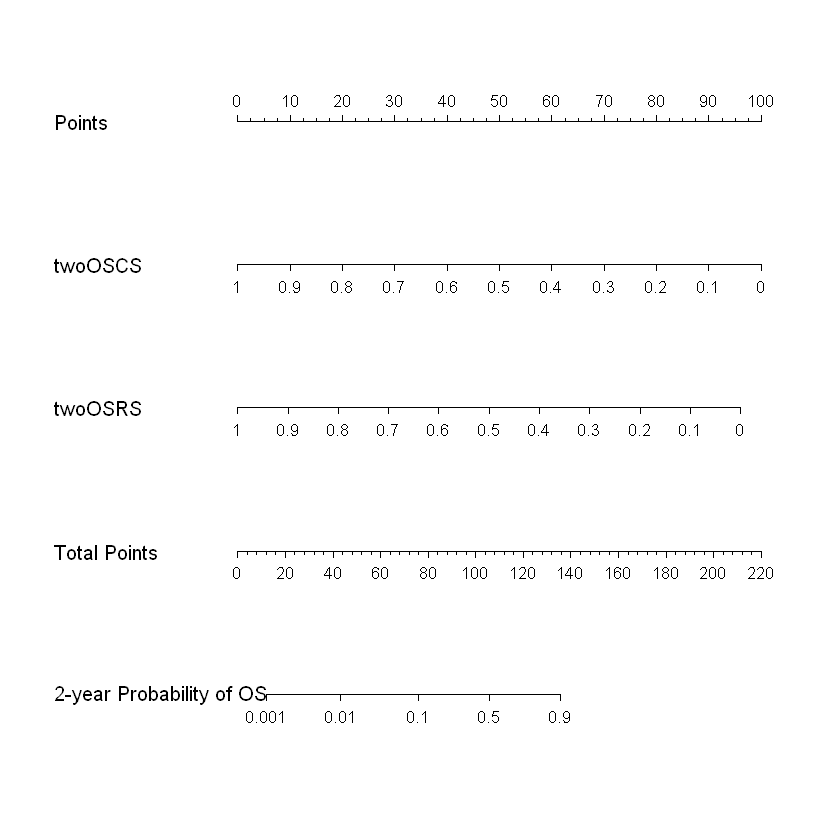

In [6]:
# Nomogram
dd=datadist(train)
options(datadist="dd")
f1 <- lrm(twoyOS~ twoOSCS
          + twoOSRS
          ,data = train,x = TRUE,y = TRUE)

nom <- nomogram(f1, fun=plogis,fun.at=c(.001, .01, seq(.1,.9, by=.4)), lp=F, funlabel="2-year Probability of OS")
plot(nom)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



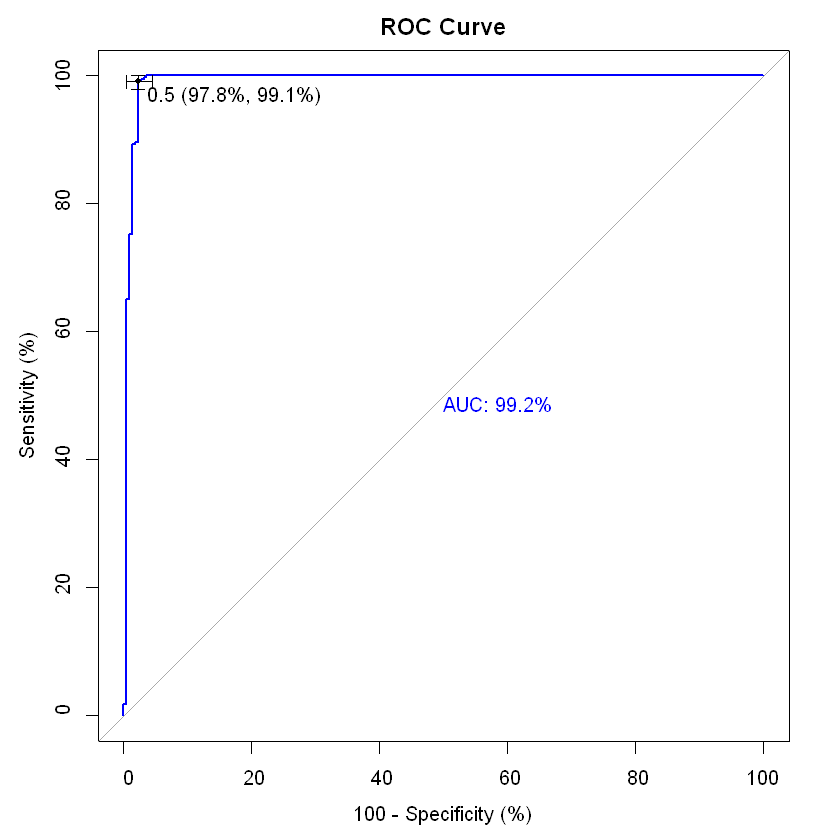

In [8]:
# ROC train
f2 <- glm(twoyOS~ twoOSCS
          + twoOSRS
          ,data = train,family = "binomial")

pre <- predict(f2, type='response')
plot.roc(train$twoyOS, pre,
         main="ROC Curve", percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars", 
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue"
         #,identity=TRUE
         ,legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



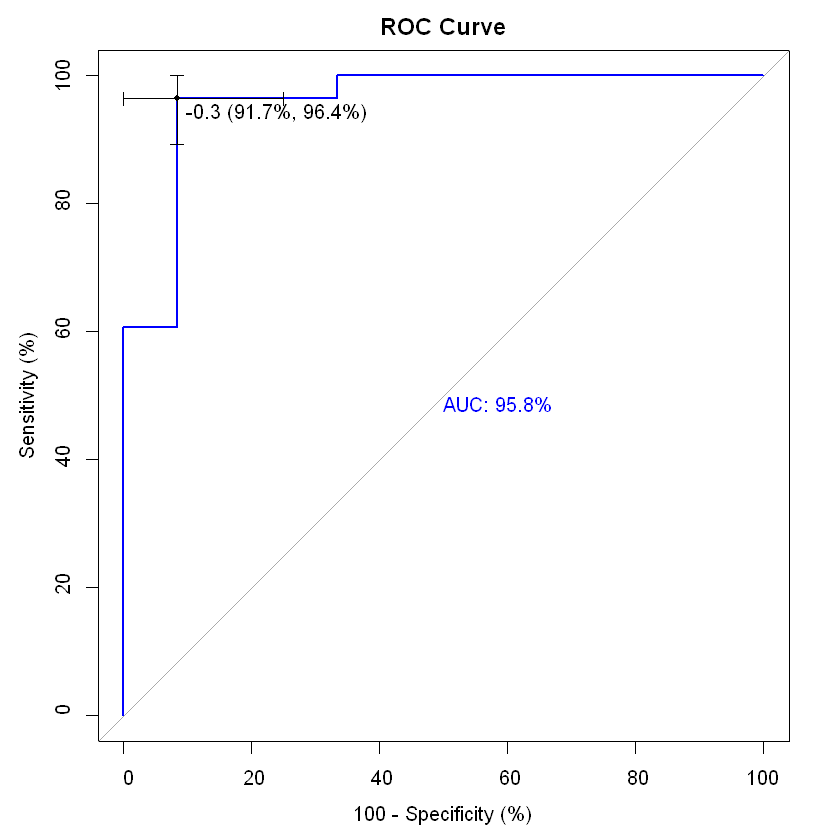

In [9]:
# ROC test
pre1 <- predict(f2,newdata = test)
plot.roc(test$twoyOS, pre1,
         main="ROC Curve", percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars",
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue",legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



95% CI: 0.9824-1 (DeLong)


Divergence or singularity in 3 samples

n=550   Mean absolute error=0.015   Mean squared error=0.00048
0.9 Quantile of absolute error=0.017



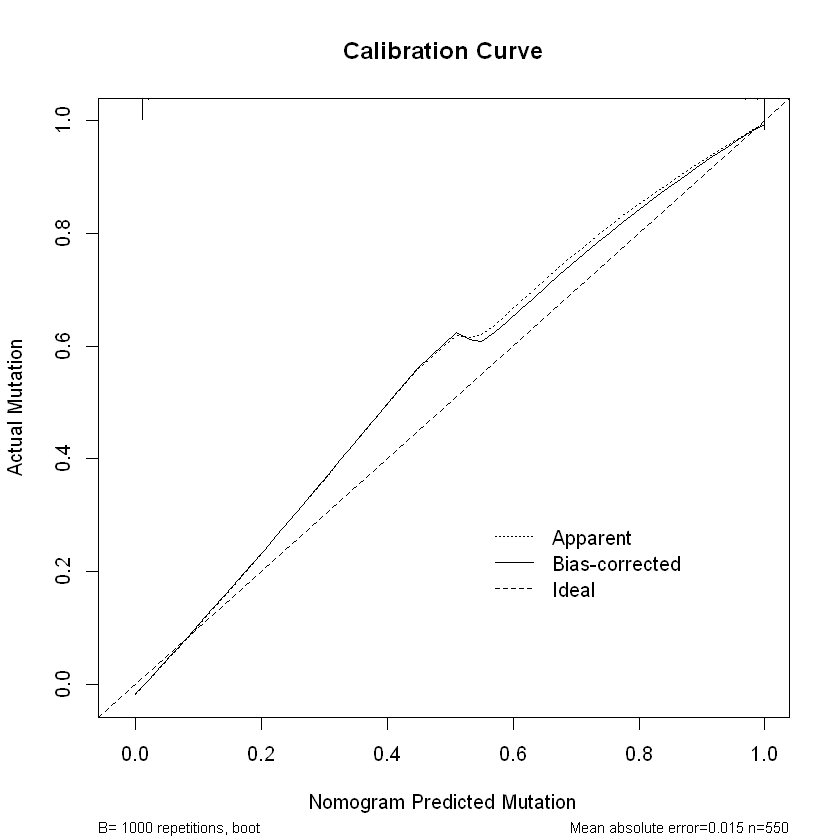

In [10]:
# Calibration Curve train
rocplot1 <- roc(train$twoyOS, pre)
ci.auc(rocplot1)
cal <- calibrate(f1,  method = "boot", B = 1000)
plot(cal, xlab = "Nomogram Predicted Mutation", ylab = "Actual Mutation",main = "Calibration Curve")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



95% CI: 0.89-1 (DeLong)


Divergence or singularity in 79 samples

n=40   Mean absolute error=0.049   Mean squared error=0.0066
0.9 Quantile of absolute error=0.066



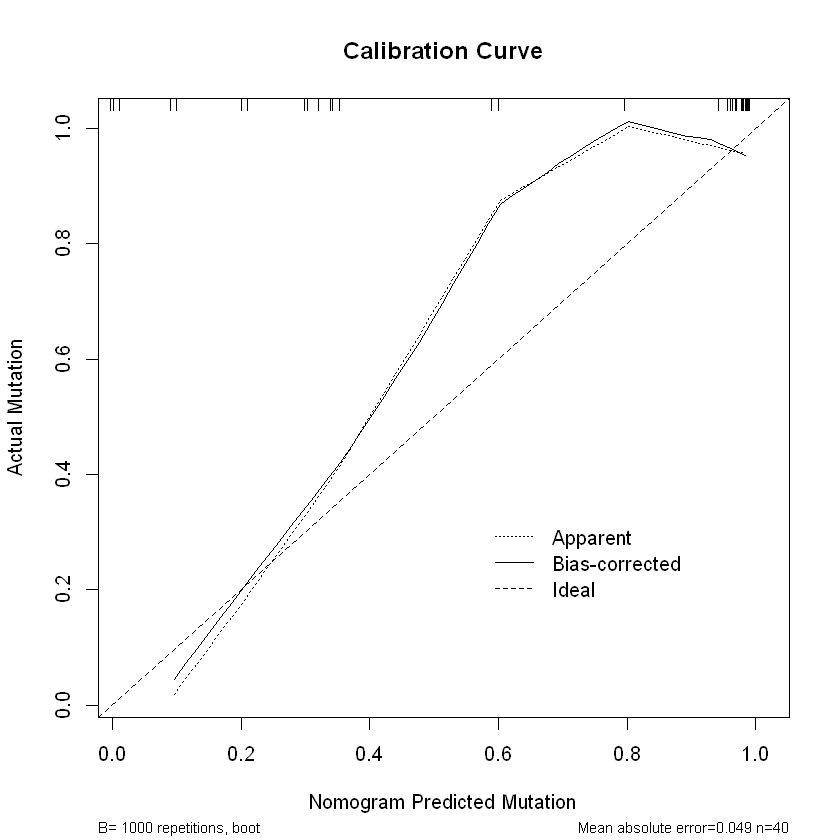

In [11]:
# Calibration Curve test
rocplot2 <- roc(test$twoyOS,pre1)
ci.auc(rocplot2)
f3 <- lrm(test$twoyOS ~ pre1,x = TRUE,y = TRUE)
cal2 <- calibrate(f3,  method = "boot", B = 1000)
plot(cal2, xlab = "Nomogram Predicted Mutation", ylab = "Actual Mutation",main = "Calibration Curve")

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



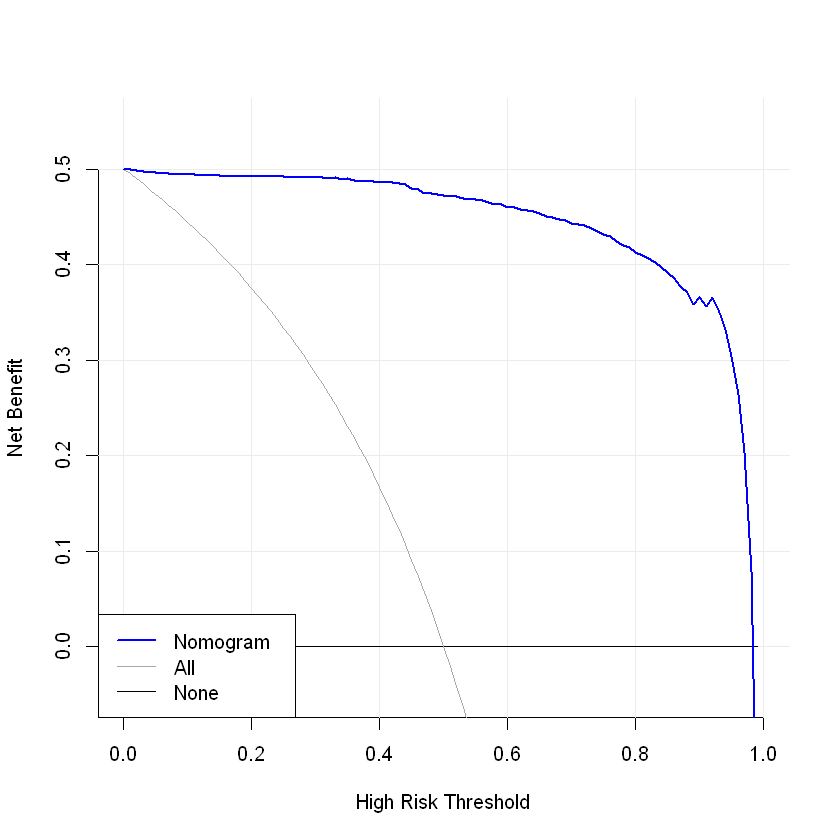

In [14]:
# Decision Curve train
clinical_Rad<- decision_curve(twoyOS~ twoOSCS
                         + twoOSRS, data = train,
                         family = binomial(link ='logit'), thresholds = seq(0,1, by = 0.01),
                         confidence.intervals= 0.95,study.design = 'case-control',
                         population.prevalence= 0.5)

List<- list(clinical_Rad)
plot_decision_curve(List,curve.names= c('Nomogram'),
                    cost.benefit.axis =FALSE,col = c('blue'),
                    confidence.intervals =FALSE,standardize = FALSE,
                    #legend.position = "none"
                    legend.position = "bottomleft"
                    )